<a href="https://colab.research.google.com/github/acse-srm3018/Traffic_Sign_Classification/blob/main/traffic_sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [ ]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import random
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd 

Using TensorFlow backend.


In [ ]:
np.random.seed(0)

In [ ]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  valid_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)    

In [ ]:
X_train, y_train = train_data['features'],train_data['labels']
X_valid, y_valid = valid_data['features'],valid_data['labels']
X_test, y_test = test_data['features'],test_data['labels']
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), 'the number of images is not equal to the number of labels'
assert(X_test.shape[0] == y_test.shape[0]), 'the number of images is not equal to the number of labels'
assert(X_valid.shape[0] == y_valid.shape[0]), 'the number of images is not equal to the number of labels'
assert(X_train.shape[1:]==(32,32,3)), "the dimension of images are not 32*32*3"

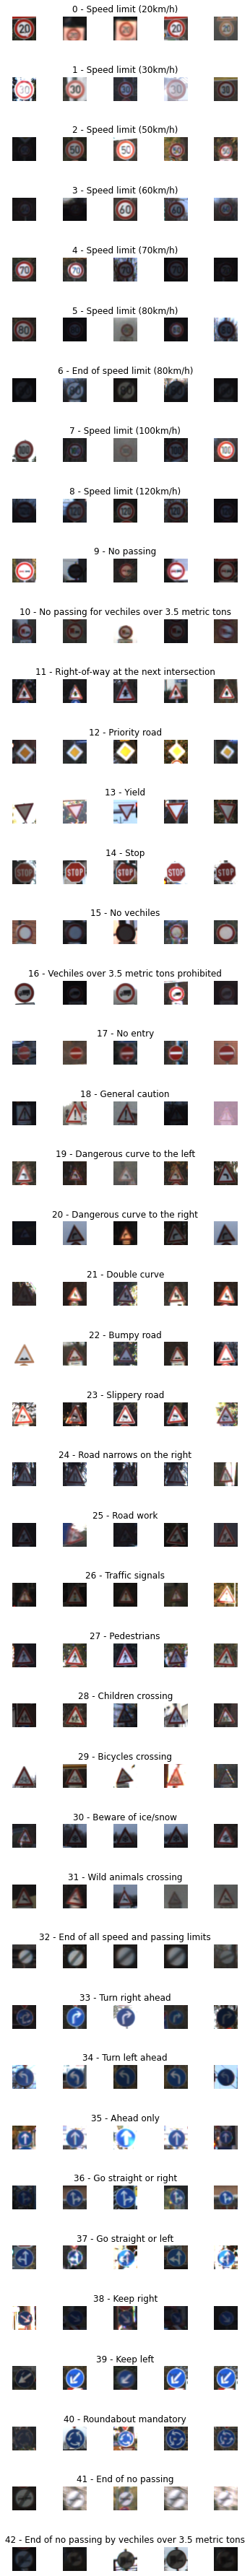

In [ ]:
data = pd.read_csv('german-traffic-signs/signnames.csv')

num_of_samples=[]
 
cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j) + " - " + row["SignName"])
        num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


Text(0, 0.5, 'Number of images')

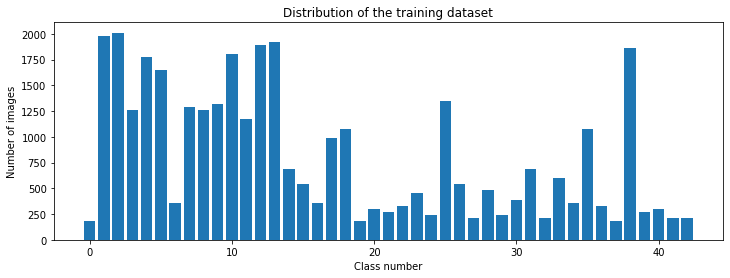

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

(32, 32, 3)
()


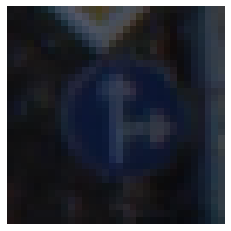

In [ ]:
import cv2
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000].shape)

(32, 32)


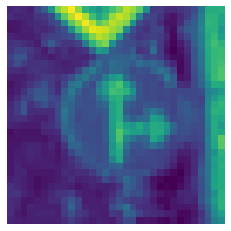

In [ ]:
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img


img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis('off')
print(img.shape)

(32, 32)


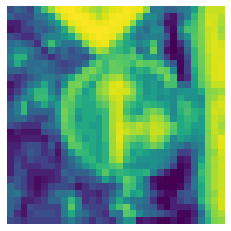

In [ ]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img


img = equalize(img)
plt.imshow(img)
plt.axis('off')
print(img.shape)

In [ ]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img/255
  return img

X_train = np.array(list(map(preprocessing, X_train)))  
X_test = np.array(list(map(preprocessing, X_test)))
X_valid = np.array(list(map(preprocessing, X_valid)))

(34799, 32, 32)


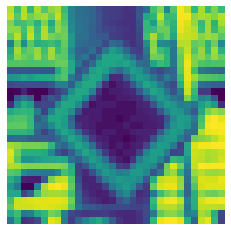

In [ ]:
plt.imshow(X_train[random.randint(0,len(X_train)-1)])
plt.axis('off')
print(X_train.shape)

In [ ]:
X_train = X_train.reshape(34799, 32, 32, 1) 
X_test = X_test.reshape(12630, 32, 32, 1) 
X_valid = X_valid.reshape(4410, 32, 32, 1)
print(X_train.shape)
print(X_test.shape) 
print(X_valid.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range = 0.1,
                             height_shift_range = 0.1,
                             zoom_range = 0.2,
                             shear_range = 0.1,
                             rotation_range = 10)
datagen.fit(X_train)

In [ ]:
#batches = datagen.flow(X_train, y_train, batch_size =20)
#X_batch, y_batch = next(batches)

In [ ]:
#fig,axs =plt.subplots(1,15,figsize=(20,5))
#fig.tight_layout()
#for i in range(15):
  #axs[i].imshow(X_batch[i].reshape(32,32))
  #axs[i].axis('off')

In [ ]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_valid = to_categorical(y_valid, 43)

In [ ]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5,5), input_shape = (32,32,1), activation = 'relu'))
  model.add(Conv2D(60, (5,5), activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(30, (3,3),activation = 'relu'))
  model.add(Conv2D(30, (3,3),activation = 'relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(43, activation = 'softmax'))
  #compile model
  model.compile(Adam(lr=0.001), loss = 'categorical_crossentropy',metrics = ['accuracy'])
  return model

model = modified_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 480)              

In [ ]:
history = model.fit_generator(datagen.flow(X_train, y_train,batch_size=50), steps_per_epoch = 2000, epochs=10, validation_data =(X_valid, y_valid), shuffle=1)

Epoch 1/10
2000/2000 [==============================] - 1092s 546ms/step - loss: 0.9034 - accuracy: 0.7350 - val_loss: 0.1203 - val_accuracy: 0.9617
Epoch 2/10
2000/2000 [==============================] - 1050s 525ms/step - loss: 0.2243 - accuracy: 0.9303 - val_loss: 0.0551 - val_accuracy: 0.9853
Epoch 3/10
2000/2000 [==============================] - 1011s 505ms/step - loss: 0.1481 - accuracy: 0.9539 - val_loss: 0.0565 - val_accuracy: 0.9850
Epoch 4/10
2000/2000 [==============================] - 1012s 506ms/step - loss: 0.1188 - accuracy: 0.9640 - val_loss: 0.0368 - val_accuracy: 0.9896
Epoch 5/10
2000/2000 [==============================] - 1016s 508ms/step - loss: 0.0997 - accuracy: 0.9692 - val_loss: 0.0620 - val_accuracy: 0.9873
Epoch 6/10
2000/2000 [==============================] - 1018s 509ms/step - loss: 0.0949 - accuracy: 0.9710 - val_loss: 0.0442 - val_accuracy: 0.9875
Epoch 7/10
2000/2000 [==============================] - 1012s 506ms/step - loss: 0.0806 - accuracy: 0.9757

Text(0.5, 0, 'epoch')

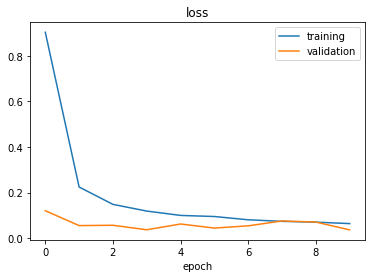

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

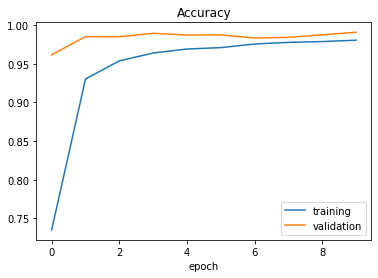

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test Score', score[0])
print('Test Accuracy', score[1])

Test Score 0.12913889555435126
Test Accuracy 0.9697545766830444


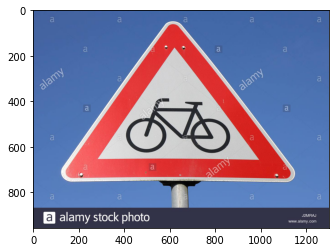

In [ ]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


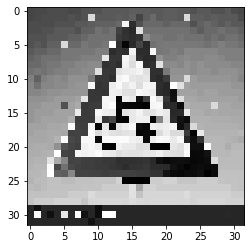

In [ ]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [ ]:
img = img.reshape(1, 32, 32, 1)

In [ ]:
print("predicted sign: "+ str(model.predict_classes(img)))

predicted sign: [29]
